In [1]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Unzip the downloaded file
!unzip creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 99%|██████████████████████████████████████▍| 65.0M/66.0M [00:00<00:00, 211MB/s]
100%|███████████████████████████████████████| 66.0M/66.0M [00:00<00:00, 209MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


Missing values: 
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


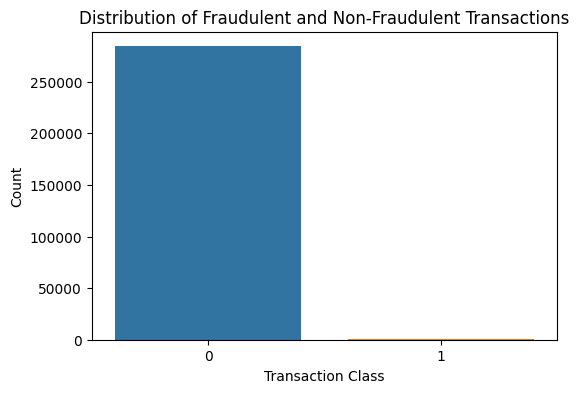

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


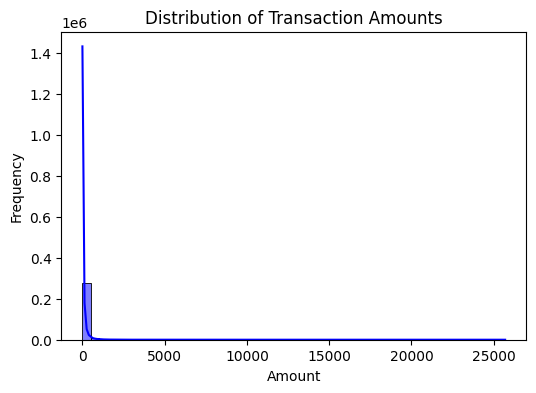

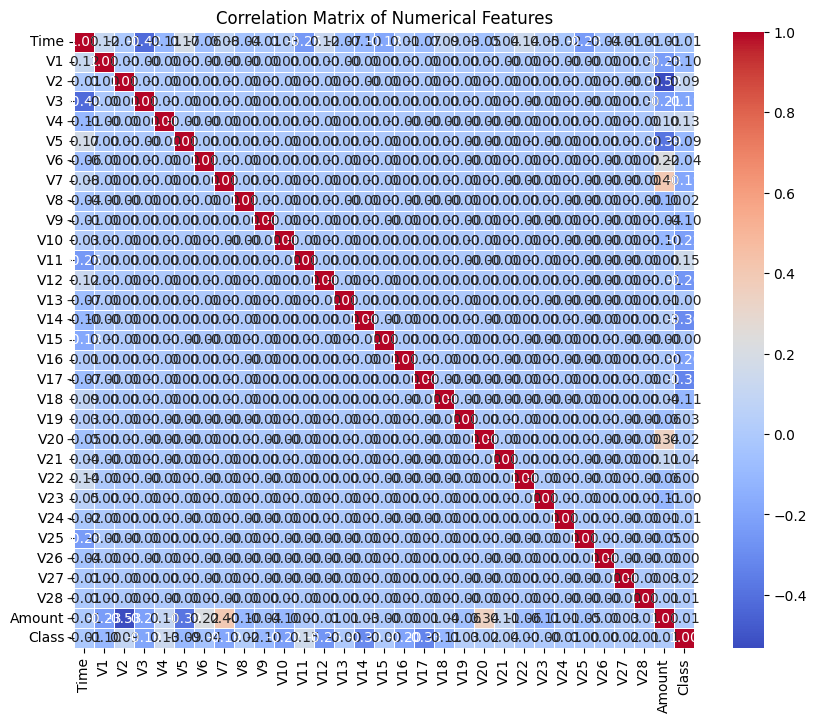

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Inspect the first few rows of the dataset
df.head()

# Check for missing values
print(f"Missing values: \n{df.isnull().sum()}")

# Visualize the distribution of fraudulent (Class=1) and non-fraudulent (Class=0) transactions
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()

# Check for any imbalanced data by visualizing the distribution of 'Amount' (or another numerical feature)
plt.figure(figsize=(6, 4))
sns.histplot(df['Amount'], kde=True, color='blue', bins=50)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Checking correlation matrix for numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


*****Data Preprocessing and Scaling*****

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Standardize the data (important for many models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (227845, 30)
Test data shape: (56962, 30)


**Model Training**

In [4]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict using Random Forest model
y_pred_rf = rf.predict(X_test)




In [5]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the Random Forest model
print("Random Forest Classifier Performance:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

[[56862     2]
 [   23    75]]


**Model Evaluation**

<Figure size 600x400 with 0 Axes>

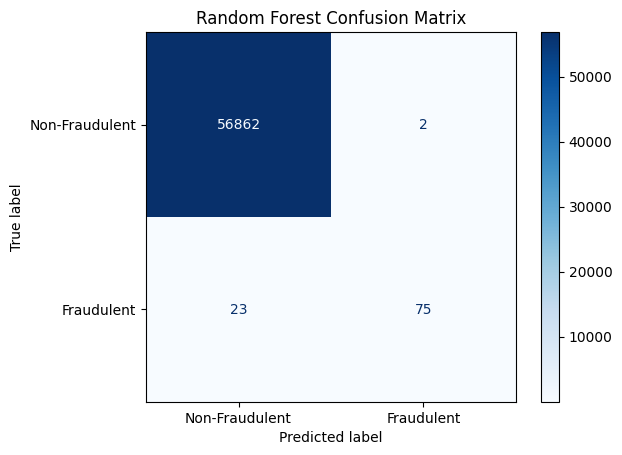

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Fraudulent', 'Fraudulent'])

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title('Random Forest Confusion Matrix')
plt.show()



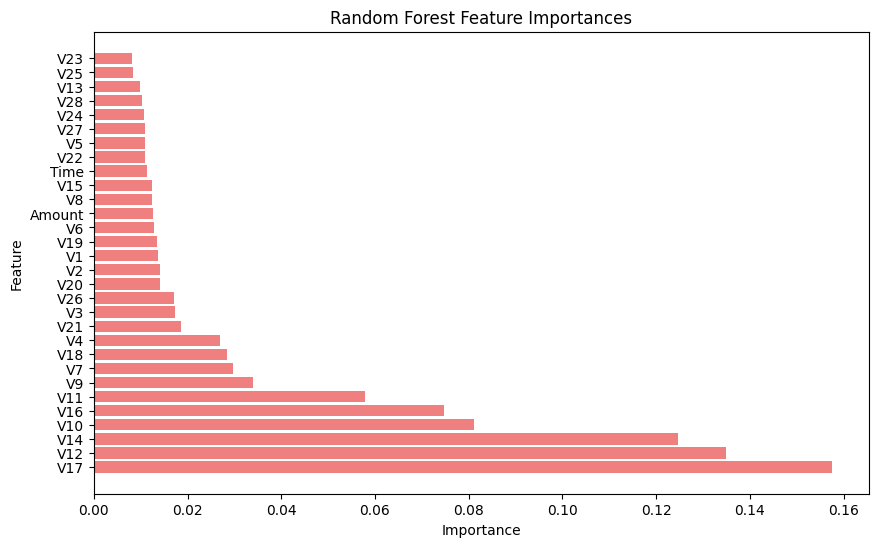

In [7]:
# Get feature importances from Random Forest
feature_importances = rf.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(df.columns[sorted_idx], feature_importances[sorted_idx], color='lightcoral')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


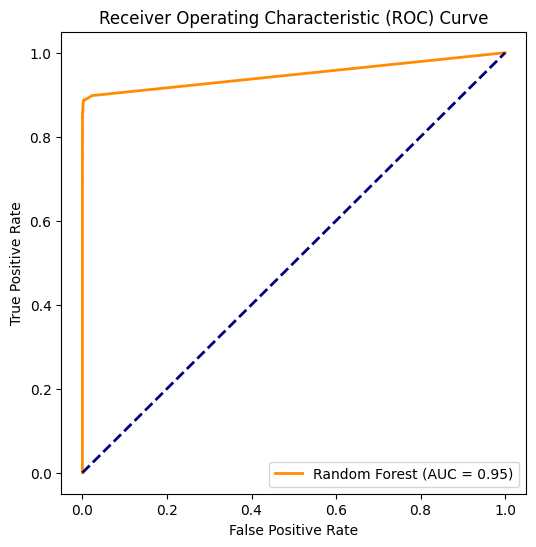

In [8]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (fraudulent transactions)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


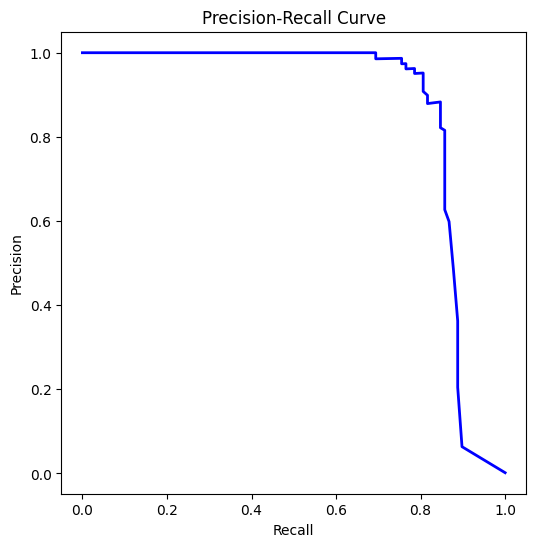

In [9]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall, precision, color='b', lw=2)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
